<h1 style="font-size:36px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">Project:</span> Real Estate Price Prediction</h1>
<hr>

This is a capstone project for Masterclass course and valid permission is taken to use the data for analytics purpose in order to reach the objectives of this project. 

## Project Context 


 - A large Real Estate Agency invests in condos, apartments and houses in a small county in New York state.
 
 
 
 - To keep a hold on the market and to refresh their internal pricing models, the agency tries to **predict the fair transaction price** of the property prior to it's selling.

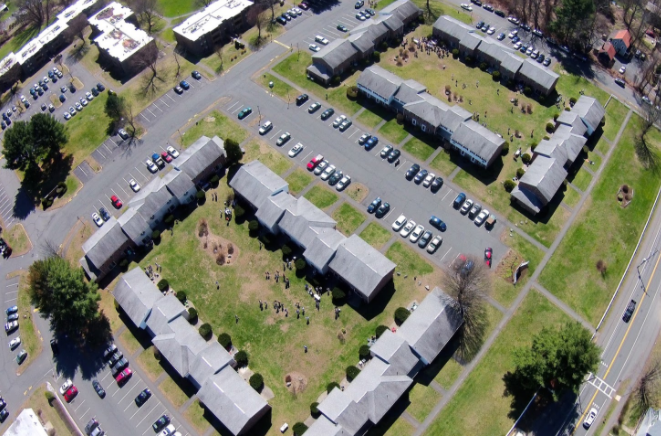

## Current Scenario

 - The agency currently enjoys the service of a 3rd party appraisal service and the appraisers visit properties to estimate a fair price.
  
  
 - However, the agency found that the estimates given by the 3rd party appraisers  **exceeds by  $70,000** on average. 

## Goal :

 - The objective here is to build a real-estate pricing model for the agency to **predict transaction prices** with an average error under $70,000 in order to have an effecient assessment system.

Before starting on finding an efficinet model I am defining the scope of the problem.

Deliverables : **Trained model** <br>
Machine Learning Task : **Regression** <br>
Target Variable : **Transaction Price** <br>
Win Condition : ** Average Prediction error < $70,000 **

### 1. Collecting Data

 - The dataset of transaction prices for previous properties on the same market has been provided by the real-estate agency, and for the purpose of achieving the goal of this project, proper permissions are taken from EliteDataScience Team to use the data.<br>
 - The data is collected in a CSV file and we will be using various python libraries to deduce actionable information from this dataset.<br>
 - The first line action would be to import all necessary libraries that we will need. 

In [1]:
from __future__ import print_function  # For Python 3 compatibility

import numpy as np    # For numerical computing

import pandas as pd   # For Dataframe and data wrangling
pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt # For visualization
%matplotlib inline
plt.rcParams['figure.figsize']=(10,7)

import seaborn as sns

Let's import the dataset. The dataset is a CSV file, so I will use pandas' read function to import it into a dataframe.

In [2]:
redf = pd.read_csv(r'C:\Users\duttaroym\Documents\Python\Projects\Real Estate Price\real_estate_data.csv')

### 2. Exploratory Data Analysis

#### *2.1 Basic Information:*

In [3]:
# Finding count of rows and columns in dataframe
redf.shape 

(1883, 26)

No of Rows : 1883 <br>
No of Columns : 26

In [4]:
# Finding count of numerical and categorical fields in the dataframe
redf.get_dtype_counts() 

float64     8
int64      15
object      3
dtype: int64

So, there are 3 categorical fields and rest all are numerical in the dataset.

In [5]:
# Filtering out the categorical column names
for i in redf.dtypes[ redf.dtypes == 'object'].index:
    print(i)

property_type
exterior_walls
roof


In [6]:
redf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883 entries, 0 to 1882
Data columns (total 26 columns):
tx_price              1883 non-null int64
beds                  1883 non-null int64
baths                 1883 non-null int64
sqft                  1883 non-null int64
year_built            1883 non-null int64
lot_size              1883 non-null int64
property_type         1883 non-null object
exterior_walls        1660 non-null object
roof                  1529 non-null object
basement              1657 non-null float64
restaurants           1883 non-null int64
groceries             1883 non-null int64
nightlife             1883 non-null int64
cafes                 1883 non-null int64
shopping              1883 non-null int64
arts_entertainment    1883 non-null int64
beauty_spas           1883 non-null int64
active_life           1883 non-null int64
median_age            1883 non-null float64
married               1883 non-null float64
college_grad          1883 non-null float64


In [7]:
redf.head(10)

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002
5,265000,1,1,641,1947,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,146,10,23,27,86,9,60,52,28.0,15.0,86.0,168.0,58.0,8.0,3.0,2004
6,240000,1,1,642,1944,0,Single-Family,Brick,NaN,NaN,159,13,36,17,92,12,66,50,28.0,36.0,88.0,176.0,61.0,7.0,3.0,2011
7,388100,1,1,650,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,266.0,92.0,9.0,3.0,2005
8,240000,1,1,660,1983,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,51,8,6,2,40,18,32,41,36.0,49.0,77.0,188.0,65.0,6.0,3.0,2013
9,250000,1,1,664,1965,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,119,10,26,25,183,13,70,36,57.0,13.0,83.0,147.0,51.0,6.0,3.0,2007


In [8]:
redf.tail(10)

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
1873,569000,5,5,7165,1991,43995,Single-Family,Brick,Wood Shake/ Shingles,1.0,9,1,1,1,11,1,3,6,49.0,82.0,68.0,1024.0,312.0,8.0,2.0,1994
1874,370000,5,5,7578,2008,87120,Single-Family,Siding (Alum/Vinyl),Composition Shingle,1.0,0,0,0,0,1,0,0,2,47.0,92.0,84.0,1045.0,318.0,9.0,3.0,2004
1875,235000,5,5,7594,2006,36154,Single-Family,Brick,Composition Shingle,1.0,8,1,0,1,5,4,5,2,52.0,85.0,57.0,1061.0,323.0,5.5,2.0,2006
1876,760000,5,5,7842,2003,436035,Single-Family,Combination,NaN,1.0,0,0,0,0,0,0,0,0,48.0,76.0,62.0,881.0,249.0,7.5,2.0,2008
1877,555000,5,5,8450,2004,91911,Single-Family,Other,Composition Shingle,1.0,7,2,1,1,4,0,3,3,35.0,91.0,85.0,1966.0,599.0,10.0,3.0,2003
1878,385000,5,6,6381,2004,224334,Single-Family,Stucco,Composition Shingle,1.0,0,0,0,0,3,0,0,1,46.0,76.0,87.0,1250.0,381.0,10.0,3.0,2002
1879,690000,5,6,6501,1956,23086,Single-Family,Brick,Composition Shingle,1.0,45,7,5,7,41,3,61,11,42.0,73.0,61.0,1553.0,473.0,9.0,3.0,2015
1880,600000,5,6,7064,1995,217800,Single-Family,Metal,Composition Shingle,1.0,5,1,1,1,8,2,1,2,43.0,87.0,66.0,942.0,287.0,8.0,1.0,1999
1881,759900,5,6,7500,2006,8886,Single-Family,Siding (Alum/Vinyl),Asphalt,1.0,18,2,4,0,5,1,8,6,43.0,61.0,51.0,803.0,245.0,5.0,2.0,2009
1882,735000,5,6,7515,1958,10497,Single-Family,Brick,Composition Shingle,1.0,0,0,0,1,2,2,0,5,37.0,80.0,86.0,1459.0,444.0,9.0,3.0,2015


#### *2.2 Numeric Features Distribution:*

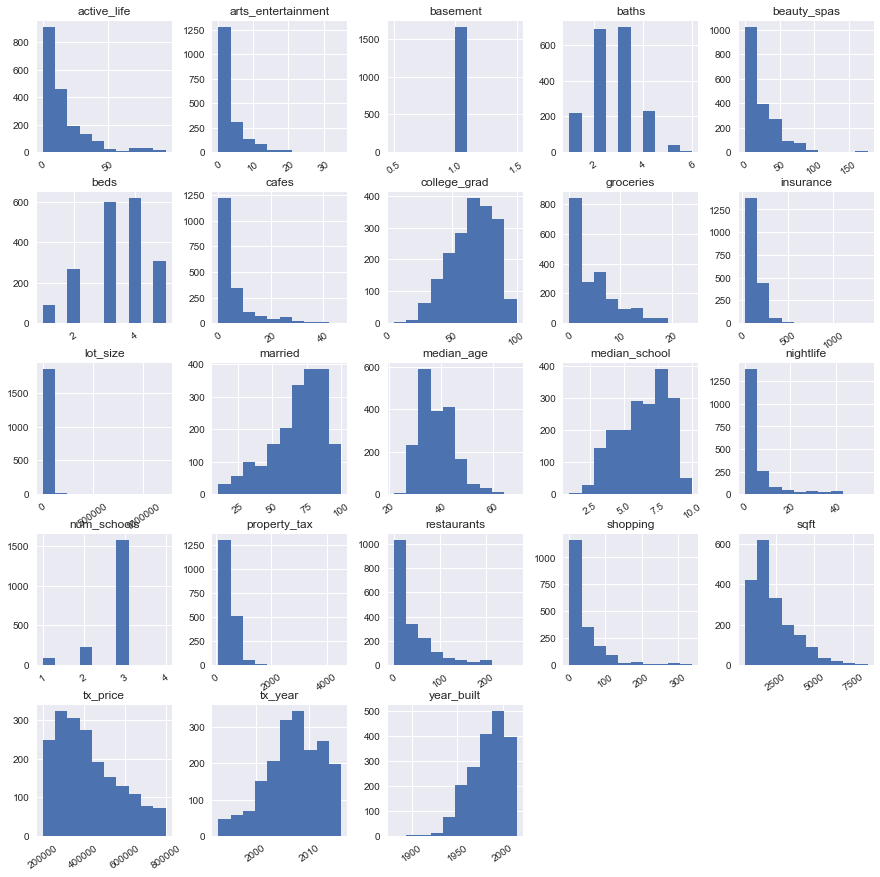

In [9]:
# Plotting histogram grid
redf.hist(figsize = (15,15), xrot = 35, grid=True)
plt.show()

In [10]:
# Summerize Numerical features
redf.describe()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1.883000e+03,1657.0,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,422839.807754,3.420605,2.579926,2329.398832,1982.963887,1.339262e+04,1.0,40.210303,4.505045,5.074881,5.325013,40.802443,3.394052,23.416888,15.835369,38.601168,69.091875,65.085502,466.777483,140.454063,6.502921,2.793415,2007.111524
std,151462.593276,1.068554,0.945576,1336.991858,20.295945,4.494930e+04,0.0,46.867012,4.491029,8.464668,7.539309,53.539296,4.699787,25.776916,17.667717,6.634110,19.659767,16.953165,231.656645,72.929765,1.996109,0.505358,5.196898
min,200000.000000,1.000000,1.000000,500.000000,1880.000000,0.000000e+00,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,11.000000,5.000000,88.000000,30.000000,1.000000,1.000000,1993.000000
25%,300000.000000,3.000000,2.000000,1345.000000,1970.000000,1.542000e+03,1.0,7.000000,1.000000,0.000000,0.000000,6.000000,0.000000,4.000000,4.000000,33.000000,58.000000,54.000000,320.000000,94.000000,5.000000,3.000000,2004.000000
50%,392000.000000,3.000000,3.000000,1907.000000,1986.000000,6.098000e+03,1.0,23.000000,3.000000,2.000000,3.000000,22.000000,2.000000,15.000000,10.000000,38.000000,73.000000,66.000000,426.000000,125.000000,7.000000,3.000000,2007.000000
75%,525000.000000,4.000000,3.000000,3005.000000,2000.000000,1.176100e+04,1.0,58.000000,7.000000,6.000000,6.000000,51.000000,5.000000,35.000000,21.000000,43.000000,84.000000,78.000000,569.000000,169.000000,8.000000,3.000000,2011.000000
max,800000.000000,5.000000,6.000000,8450.000000,2015.000000,1.220551e+06,1.0,266.000000,24.000000,54.000000,47.000000,340.000000,35.000000,177.000000,94.000000,69.000000,100.000000,100.000000,4508.000000,1374.000000,10.000000,4.000000,2016.000000


#### *2.3 Categorical Features Distribution:*

In [11]:
# Summerize Categorical Features
redf.describe(include=['object'])

,property_type,exterior_walls,roof
count,1883,1660,1529
unique,2,16,16
top,Single-Family,Brick,Composition Shingle
freq,1080,687,1179


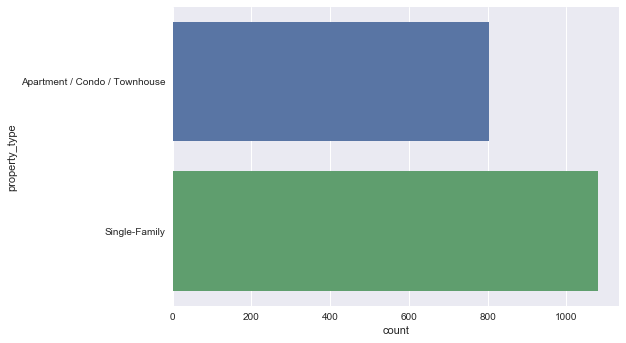

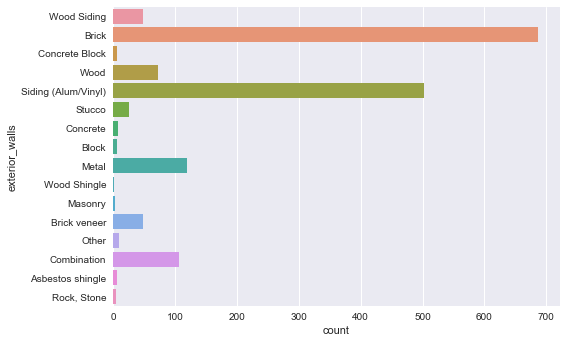

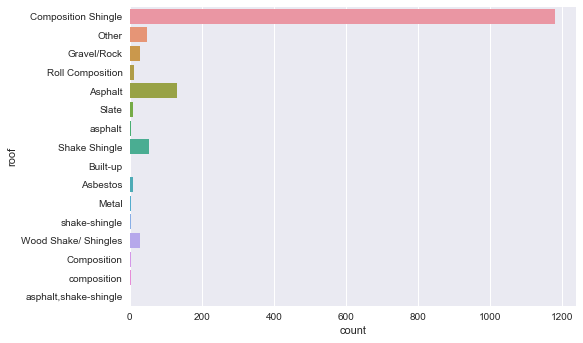

In [12]:
# Plotting countplot for each Categorical Features
for i in redf.dtypes[redf.dtypes == 'object'].index:
    sns.countplot(y = i, data = redf)
    plt.show()

#### *2.4 Segmentation:*

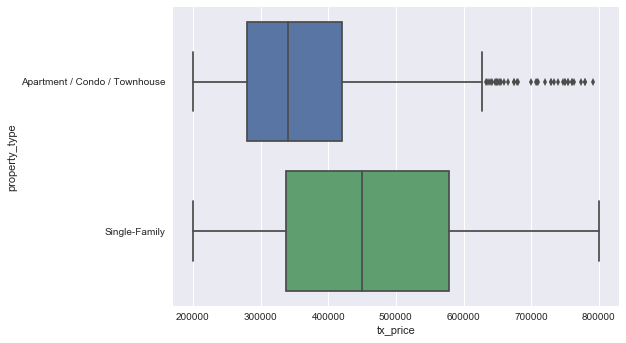

In [13]:
sns.boxplot(data=redf, x='tx_price', y='property_type')

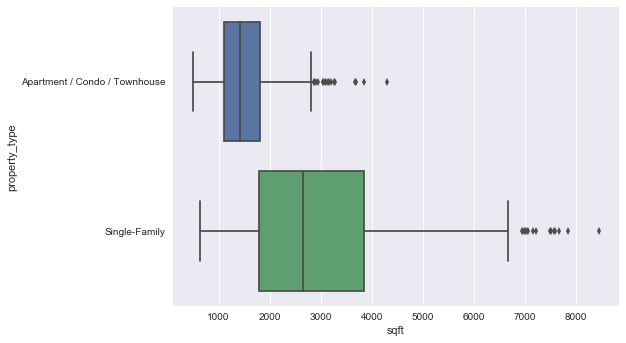

In [14]:
sns.boxplot(data=redf, x='sqft', y='property_type')

In [15]:
redf.groupby('property_type').agg([np.mean,np.std])

tx_price                     beds  \
                                        mean            std      mean   
property_type                                                           
Apartment / Condo / Townhouse  366614.034869  121784.490486  2.601494   
Single-Family                  464644.711111  157758.739013  4.029630   

                                            baths                   sqft  \
                                    std      mean       std         mean   
property_type                                                              
Apartment / Condo / Townhouse  0.810220  2.200498  0.815009  1513.727273   
Single-Family                  0.795639  2.862037  0.937551  2935.865741   

                                             year_built             \
                                       std         mean        std   
property_type                                                        
Apartment / Condo / Townhouse   556.286650  1988.936488  15.513640   
Single-Family                  1422.871169  1978.523148  22.210582   

                                   lot_size               basement       \
                                       mean           std     mean  std   
property_type                                                             
Apartment / Condo / Townhouse   3944.239103  44284.168767      1.0  0.0   
Single-Family                  20417.666667  44165.529302      1.0  0.0   

                              restaurants            groceries            \
                                     mean        std      mean       std   
property_type                                                              
Apartment / Condo / Townhouse   58.418431  54.343594  5.919054  4.645774   
Single-Family                   26.672222  34.726416  3.453704  4.067285   

                              nightlife                cafes            \
                                   mean        std      mean       std   
property_type                                                            
Apartment / Condo / Townhouse  7.855542  10.643816  8.037360  9.077038   
Single-Family                  3.007407   5.543822  3.308333  5.325053   

                                shopping            arts_entertainment  \
                                    mean        std               mean   
property_type                                                            
Apartment / Condo / Townhouse  57.631382  61.852299           4.840598   
Single-Family                  28.289815  42.292313           2.318519   

                                        beauty_spas            active_life  \
                                    std        mean        std        mean   
property_type                                                                
Apartment / Condo / Townhouse  5.234834   32.087173  26.910443   22.410959   
Single-Family                  3.929691   16.970370  22.872112   10.946296   

                                         median_age              married  \
                                     std       mean       std       mean   
property_type                                                              
Apartment / Condo / Townhouse  21.058178  37.199253  6.906584  57.534247   
Single-Family                  12.599296  39.643519  6.225732  77.685185   

                                         college_grad            property_tax  \
                                     std         mean        std         mean   
property_type                                                                   
Apartment / Condo / Townhouse  20.372706    66.372354  17.095874   346.261519   
Single-Family                  13.868205    64.128704  16.790347   556.383333   

                                            insurance             \
                                      std        mean        std   
property_type                                                      
Apartment / Condo / Townhouse  142.292282  105.652553  47

From these charts, 
 - it appears that single family houses have bigger size than apartments.
 - the average price of apartment/condo is lesser than single family houses.
 - the variance of price and variance of size in sqft is higher in single-family houses.

#### *2.5 Correlation:*

In [16]:
correlation = redf.corr()
correlation

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
tx_price,1.000000,0.384046,0.389375,0.469573,0.033138,0.130558,NaN,-0.038027,-0.094314,0.009361,-0.001398,-0.038246,-0.021076,-0.054349,-0.001165,0.126335,0.200494,0.268577,0.535148,0.532947,0.175762,-0.014380,0.108782
beds,0.384046,1.000000,0.644572,0.691039,-0.011844,0.164399,NaN,-0.495834,-0.421412,-0.440844,-0.464289,-0.388670,-0.442168,-0.419832,-0.486957,0.133711,0.643240,-0.082354,0.547643,0.485776,0.137309,-0.124359,-0.174081
baths,0.389375,0.644572,1.000000,0.682060,0.206141,0.132976,NaN,-0.350210,-0.340024,-0.306686,-0.316836,-0.259603,-0.305885,-0.282008,-0.329736,0.095844,0.442225,0.016097,0.525776,0.475430,0.163365,-0.088299,-0.132110
sqft,0.469573,0.691039,0.682060,1.000000,0.254589,0.246016,NaN,-0.353759,-0.371167,-0.281540,-0.300969,-0.275586,-0.293402,-0.310465,-0.332663,0.109811,0.480167,0.065343,0.660264,0.594049,0.220669,-0.102032,-0.236190
year_built,0.033138,-0.011844,0.206141,0.254589,1.000000,0.000068,NaN,-0.106948,-0.222443,-0.080006,-0.102209,-0.121684,-0.195141,-0.163670,-0.134919,-0.237152,0.038208,-0.014204,-0.046504,-0.109521,0.155835,-0.188106,-0.043301
lot_size,0.130558,0.164399,0.132976,0.246016,0.000068,1.000000,NaN,-0.113887,-0.118574,-0.072224,-0.098182,-0.116560,-0.067189,-0.121075,-0.092668,0.099140,0.122028,-0.030725,0.165800,0.146579,0.096551,-0.031535,-0.048207
basement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restaurants,-0.038027,-0.495834,-0.350210,-0.353759,-0.106948,-0.113887,NaN,1.000000,0.701462,0.926675,0.937616,0.818815,0.726907,0.867829,0.881799,-0.063816,-0.615584,0.214260,-0.100821,-0.019925,-0.068425,0.251171,0.044739
groceries,-0.094314,-0.421412,-0.340024,-0.371167,-0.222443,-0.118574,NaN,0.701462,1.000000,0.565003,0.602857,0.526356,0.502837,0.626850,0.574532,-0.022377,-0.508793,-0.006025,-0.159506,-0.093974,-0.354553,0.272856,0.115674
nightlife,0.009361,-0.440844,-0.306686,-0.281540,-0.080006,-0.072224,NaN,0.926675,0.565003,1.000000,0.923901,0.743321,0.703038,0.777461,0.858836,-0.028611,-0.568811,0.253717,-0.054386,0.024551,-0.036948,0.196399,0.027495


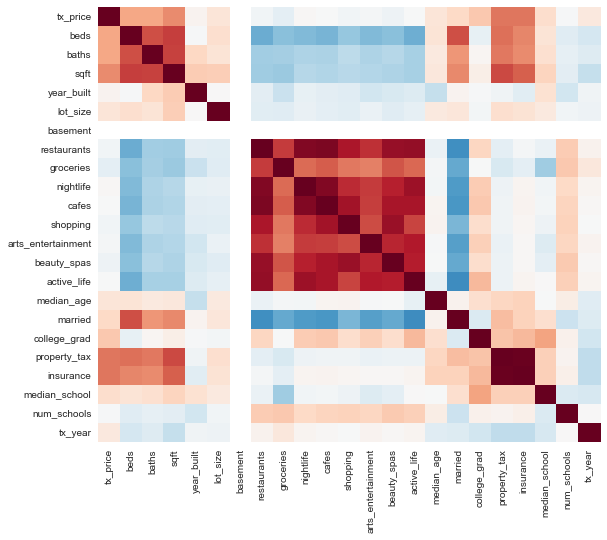

In [17]:
plt.figure(figsize=(9,8))
sns.set_style('white')
sns.heatmap(correlation, cbar=False) 

In [18]:
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

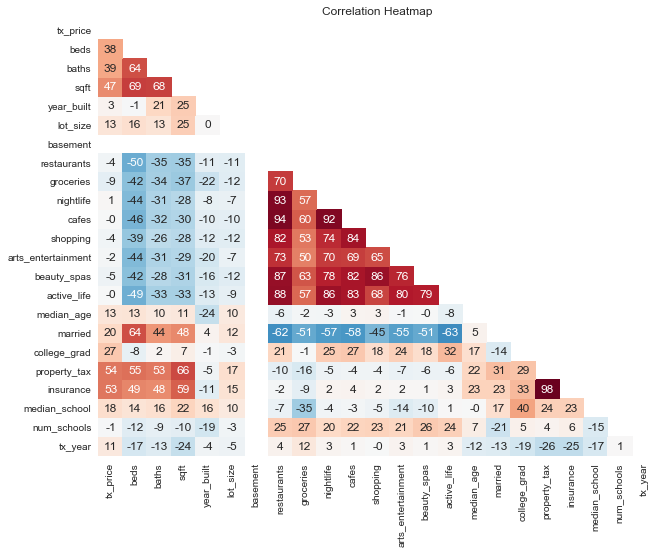

In [19]:
plt.figure(figsize=(10,8))
cor = correlation*100
sns.heatmap(cor,mask=mask, annot=True, fmt='.0f', cbar=False) 
plt.title("Correlation Heatmap")

### 3. Data Cleaning

#### *3.1 Duplicates:*

Let's remove the duplicates if any from the dataset. 

In [20]:
# Removing duplicates
redf = redf.drop_duplicates()

In [21]:
redf.shape

(1883, 26)

#### *3.2 Structural Errors, Typos :*

Next, let's fix any structural errors if present. 

In [22]:
# Displaying unique values of 'basement'
redf['basement'].unique()

array([ nan,   1.])

In [23]:
redf['basement'] = redf['basement'].fillna(0)

In [24]:
redf['basement'].unique()

array([ 0.,  1.])

Next, it would be wise to check if there is any typos or inconsistent capitalization in the categorical data. To do this, its important to see the class distribution.

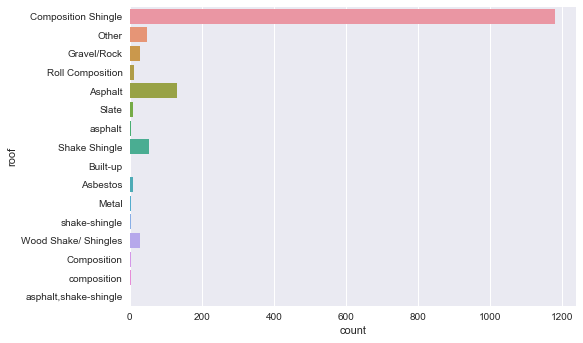

In [25]:
sns.set_style('darkgrid')
sns.countplot(y ='roof', data=redf)

In [26]:
redf['roof'].replace('composition', 'Composition', inplace=True)

In [27]:
redf['roof'].replace('asphalt', 'Asphalt', inplace=True)
redf['roof'].replace(['shake-shingle','asphalt,shake-shingle'], 'Shake Shingle', inplace=True)

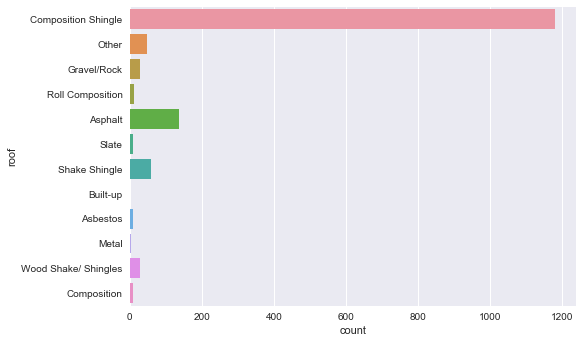

In [28]:
sns.countplot(y = 'roof', data = redf)

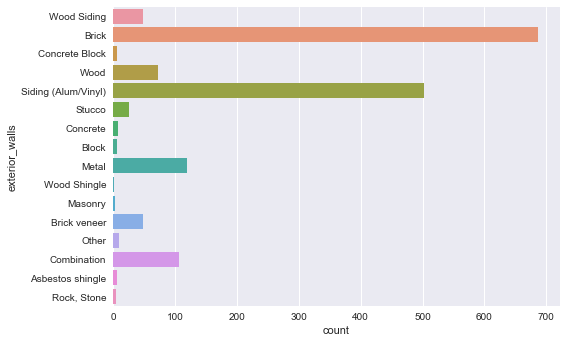

In [29]:
sns.countplot(y='exterior_walls', data=redf)

In [30]:
redf['exterior_walls'].replace('Rock, Stone', 'Masonry', inplace=True)
redf['exterior_walls'].replace(['Concrete','Block'],'Concrete Block', inplace=True)

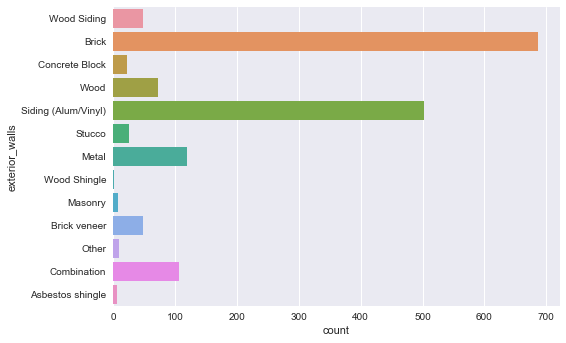

In [31]:
sns.countplot(y='exterior_walls', data=redf)

#### *3.3 Outliers:*

Checking and removing outliers when necessary is an important step in Data cleaning because it can cause issues for some models <br>


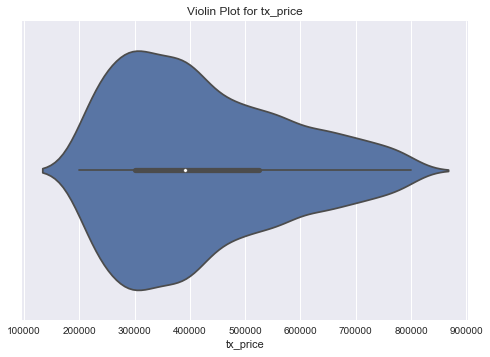

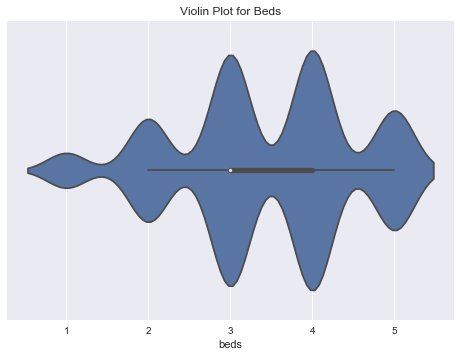

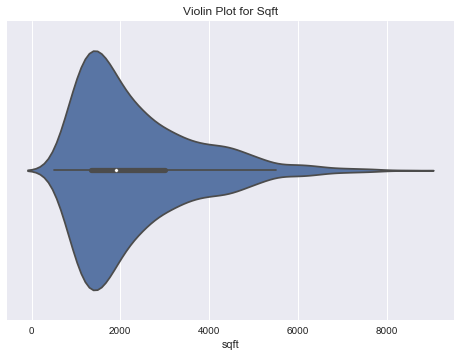

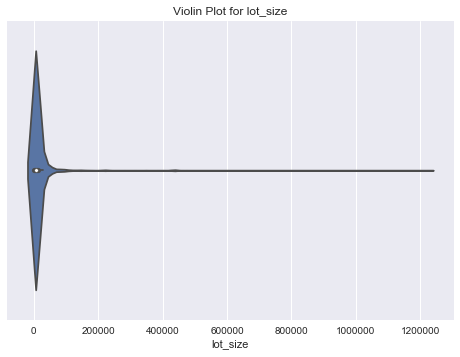

In [32]:

sns.violinplot(redf['tx_price'])
plt.title("Violin Plot for tx_price")
plt.show()

sns.violinplot(redf['beds'])
plt.title("Violin Plot for Beds")
plt.show()

sns.violinplot(redf['sqft'])
plt.title("Violin Plot for Sqft")
plt.show()

sns.violinplot(redf['lot_size'])
plt.title("Violin Plot for lot_size")
plt.show()

From these features, it looks like **lot_size** has potential outliers. Let's check the largest 5 values in lot_size. 

In [33]:
redf['lot_size'].sort_values(ascending=False)[:5]

102     1220551
1111     436471
1876     436035
1832     436035
1115     435600
Name: lot_size, dtype: int64

The largest property size is 12,20,551 sqft and the next largest is 4,36,471 sqft. It is unlikely that thereal estate agency will invest in such huge property. Since this is the only one with such huge size, it is better to remove it from our dataset.

In [34]:
# Remove lot_size outliers
redf = redf[redf['lot_size'] < 500000]

# print length of dataset
print(len(redf))

1882


#### *3.4 Missing Data:*

First, we will see if there any **missing values in categorical data.**

In [35]:
# Counting the missing values in categorical features
redf.select_dtypes(include = ['object']).isnull().sum()

property_type       0
exterior_walls    223
roof              353
dtype: int64

In [36]:
# Filling missing values in categorical features
for i in redf.select_dtypes(include = ['object']):
    redf[i].fillna('Missing', inplace=True)

In [37]:
redf.select_dtypes(include = ['object']).isnull().sum()

property_type     0
exterior_walls    0
roof              0
dtype: int64

Now, lets check if there is any **missing values in numerical features.**

In [38]:
redf.select_dtypes(exclude = ['object']).isnull().sum()

tx_price              0
beds                  0
baths                 0
sqft                  0
year_built            0
lot_size              0
basement              0
restaurants           0
groceries             0
nightlife             0
cafes                 0
shopping              0
arts_entertainment    0
beauty_spas           0
active_life           0
median_age            0
married               0
college_grad          0
property_tax          0
insurance             0
median_school         0
num_schools           0
tx_year               0
dtype: int64

Well, it looks like we don't have any numerical features with missing values in this dataset.<br>

Since we have cleaned the dataset, it is useful to save it in a new dataset and use it onwards for creating an efficient model for achieving our goal.

In [39]:
# Save cleaned dataframe to new file
redf.to_csv('cleaned_df.csv', index=None)



<br>

### 4. Feature Engineering

In [40]:
# Load cleaned dataset
df = pd.read_csv('cleaned_df.csv')

#### *4.1 Indicator variable through domain knowledge*

In [41]:
# Creating indicator variable for properties with 2 beds and 2 baths
df['two_and_two'] = ((df['beds'] == 2) & (df['baths'] == 2)).astype(int)

In [42]:
# Display percent of rows where two_and_two == 1
df.two_and_two.mean()

0.09458023379383634

In [43]:
# Creating indicator feature for transactions between 2010 and 2013, inclusive
df['during_recession'] = df['tx_year'].between(2010,2013).astype(int)

#### *4.2 Interaction Features*

Now creating 'property_age' feature for the age of the property at the time of the transaction.

In [44]:
# Create a property age feature
df['property_age'] = df['tx_year'] - df['year_built']

In [45]:
# Should not be less than 0
min(df['property_age'])

-8

In [46]:
# Number of observations with 'property_age' < 0
sum(df['property_age'] < 0)

19

In [47]:
# Remove rows where property_age is less than 0
df = df[df['property_age'] >= 0]

# Print number of rows in remaining dataframe
print(len(df))

1863


Creating another interaction feature called 'school_score'

In [48]:
# Create a school score feature that num_schools * median_school
df['school_score'] = df['num_schools'] * df['median_school']

In [49]:
# Display median school score
np.median(df['school_score'])

18.0

#### *4.3 Group Sparse Classes*

Let's begin by plotting the count plots for 'exterior_walls' again.

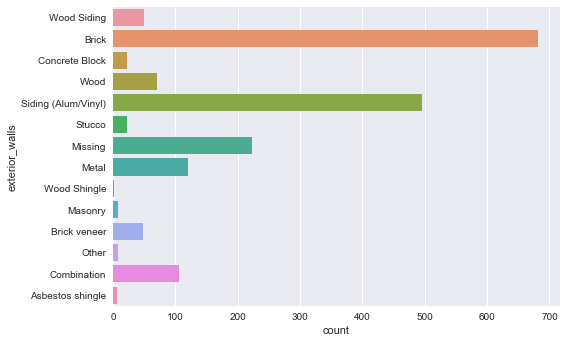

In [50]:
# Bar plot for exterior_walls
sns.countplot(data = df, y = 'exterior_walls')

We can see, **'Wood Siding', 'Wood', 'Wood Shingle'** all of them contains wood. It would be easier to combine them as one variable **'Wood'**

In [51]:
# Group 'Wood Siding' and 'Wood Shingle' with 'Wood'
df['exterior_walls'].replace(['Wood Siding', 'Wood Shingle'], 'Wood', inplace=True)

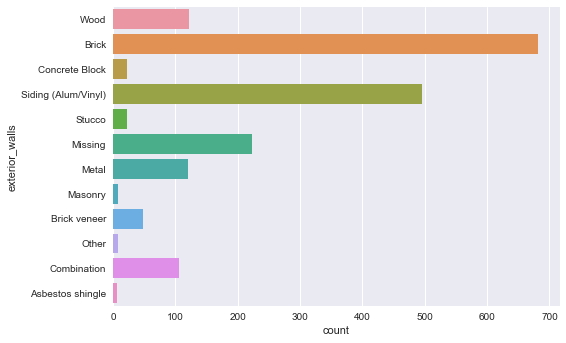

In [52]:
sns.countplot(data = df, y = 'exterior_walls')

Next, let's label **'Stucco', 'Other', 'Asbestos shingle', 'Concrete Block', and 'Masonry'** as ***'Other':***

In [53]:
# List of classes to group
other_exterior_walls = ['Stucco', 'Other', 'Asbestos shingle', 'Concrete Block','Masonry', 'Other']

# Group other classes into 'Other'
df['exterior_walls'].replace(other_exterior_walls, 'Other', inplace=True)

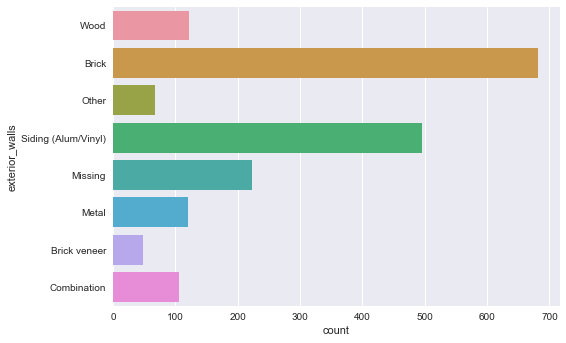

In [54]:
sns.countplot(data = df, y = 'exterior_walls')

Let's check for sparse group for ***Roof***

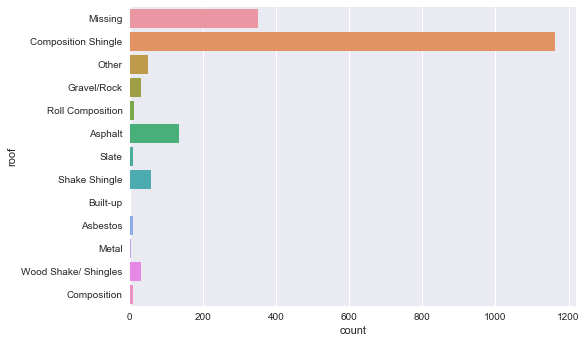

In [55]:
# Bar plot for roof
sns.countplot(data = df, y = 'roof')

In [56]:
# Group 'Composition' and 'Wood Shake/ Shingles' into 'Composition Shingle'
df['roof'].replace(['Composition', 'Wood Shake/ Shingles'], 'Composition Shingle', inplace = True)

In [57]:
# List of classes to group
other_group = ['Other', 'Gravel/Rock', 'Roll Composition', 'Slate', 'Built-up', 'Asbestos', 'Metal']

# Group other classes into 'Other'
df['roof'].replace(other_group, 'Other', inplace = True)

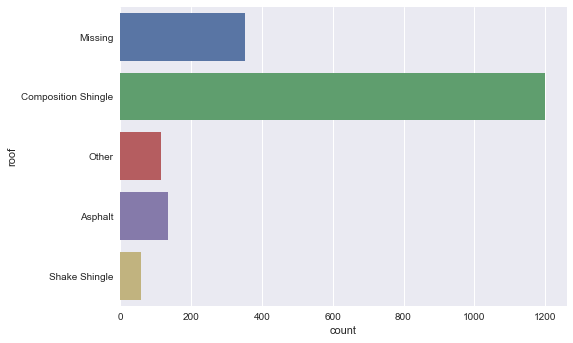

In [58]:
# Bar plot for roof
sns.countplot(data = df, y = 'roof')

#### *4.4 Encode Dummy Variables*

Its important to encode all the Categorical variable to numerical so that machine learning algorithm can handle them swiftly.<br>

So, we need to create a new dataframe with dummy variables for for our categorical features.

In [59]:
# Create new dataframe with dummy features
df = pd.get_dummies(df, columns = ['exterior_walls', 'roof', 'property_type'])

In [60]:
# First 10 rows of dataframe
df.head(10)

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,two_and_two,during_recession,property_age,school_score,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
0,295850,1,1,584,2013,0,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013,0,1,0,27.0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
1,216500,1,1,612,1965,0,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006,0,0,41,9.0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,279900,1,1,615,1963,0,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012,0,1,49,24.0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
3,379900,1,1,618,2000,33541,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005,0,0,5,27.0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
4,340000,1,1,634,1992,0,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002,0,0,10,27.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
5,265000,1,1,641,1947,0,0.0,146,10,23,27,86,9,60,52,28.0,15.0,86.0,168.0,58.0,8.0,3.0,2004,0,0,57,24.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
6,240000,1,1,642,1944,0,0.0,159,13,36,17,92,12,66,50,28.0,36.0,88.0,176.0,61.0,7.0,3.0,2011,0,1,67,21.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
7,388100,1,1,650,2000,33541,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,266.0,92.0,9.0,3.0,2005,0,0,5,27.0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
8,240000,1,1,660,1983,0,0.0,51,8,6,2,40,18,32,41,36.0,49.0,77.0,188.0,65.0,6.0,3.0,2013,0,1,30,18.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
9,250000,1,1,664,1965,0,0.0,119,10,26,25,183,13,70,36,57.0,13.0,83.0,147.0,51.0,6.0,3.0,2007,0,0,42,18.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


#### *4.5 Remove unused or redundant features*

In [61]:
# Drop 'tx_year' and 'year_built' from the dataset
df = df.drop(['tx_year', 'year_built'], axis = 1)

In [62]:
# Save analytical base table
df.to_csv("analytical_base_table.csv", index = None)

<br>
### 5. Model Training###

Since our data is ready, we'll begin to train our models now. We'll use five algorithms: Lasso, Ridge, ElasticNet, RandomForest and Gradient Boosting Regression. Finally, we'll ensemble the models to generate final predictions.Let's import some necessary libraries for model training.

In [63]:
# Scikit-Learn for Modeling
import sklearn

# Import Elastic Net, Ridge Regression, and Lasso Regression
from sklearn.linear_model import ElasticNet, Ridge, Lasso

# Import Random Forest and Gradient Boosted Trees
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [64]:
# Load cleaned dataset 
df = pd.read_csv('analytical_base_table.csv')

print(df.shape)

(1863, 40)


#### *5.1 Splitting the dataset*

In [65]:
# Function for splitting training and test set
from sklearn.model_selection import train_test_split

In [66]:
# Create separate object for target variable
y = df['tx_price']

# Create separate object for input features
X = df.drop('tx_price', axis = 1)

In [67]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

In [68]:
print("X_train: {}  X_test :{}  y_train : {}  y_test : {}".format(len(X_train), len(X_test), len(y_train), len(y_test)))

X_train: 1490  X_test :373  y_train : 1490  y_test : 373


#### *5.2 Pipeline*

In [69]:
# Summary statistics of X_train
X_train.describe()

,beds,baths,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,two_and_two,during_recession,property_age,school_score,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
count,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000
mean,3.434228,2.579195,2322.785235,12746.659732,0.878523,39.495973,4.388591,5.004698,5.185906,39.561074,3.361745,22.909396,15.770470,38.508725,69.471141,65.012752,464.265772,139.610067,6.510067,2.779195,0.092617,0.265772,24.343624,17.940268,0.359732,0.024161,0.059060,0.065772,0.119463,0.037584,0.268456,0.065772,0.073154,0.643624,0.189262,0.060403,0.033557,0.419463,0.580537
std,1.072914,0.930476,1297.101677,34805.545024,0.326790,46.985862,4.498340,8.441995,7.442707,52.334853,4.693709,25.724463,17.999282,6.615223,19.865080,17.092542,227.249819,71.510905,1.975224,0.517235,0.289993,0.441892,21.209025,6.452059,0.480083,0.153601,0.235817,0.247966,0.324442,0.190252,0.443305,0.247966,0.260477,0.479089,0.391848,0.238311,0.180146,0.493637,0.493637
min,1.000000,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,11.000000,5.000000,88.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,1351.000000,1542.000000,1.000000,6.000000,1.000000,0.000000,0.000000,6.000000,0.000000,4.000000,4.000000,33.000000,59.000000,53.250000,321.000000,94.000000,5.000000,3.000000,0.000000,0.000000,6.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,3.000000,1913.500000,6183.000000,1.000000,21.000000,3.000000,2.000000,3.000000,20.000000,2.000000,15.000000,10.000000,38.000000,74.000000,66.000000,426.000000,125.000000,7.000000,3.000000,0.000000,0.000000,20.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,3.000000,3014.750000,11761.000000,1.000000,56.000000,7.000000,6.000000,6.000000,50.000000,5.000000,35.000000,21.000000,43.000000,84.000000,78.000000,572.000000,169.000000,8.000000,3.000000,0.000000,1.000000,38.000000,24.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,5.000000,6.000000,7842.000000,436471.000000,1.000000,266.000000,24.000000,53.000000,47.000000,340.000000,35.000000,177.000000,94.000000,69.000000,100.000000,100.000000,4508.000000,1374.000000,10.000000,4.000000,1.000000,1.000000,114.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


It appears that the mean and standard deviation is not standardized. <br>
So it needs to be standardized as it is a common requirement for many machine learning algorithms.

In [70]:
# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

# For standardization
from sklearn.preprocessing import StandardScaler

Next, lets create a pipeline dictionary as this will be useful for training the data.

In [71]:
# Create pipelines dictionary
ppln = {'lasso' : make_pipeline(StandardScaler(), Lasso(random_state = 123)),
             'ridge' : make_pipeline(StandardScaler(), Ridge(random_state = 123)),
             'enet' : make_pipeline(StandardScaler(), ElasticNet(random_state = 123)),
               'rf' : make_pipeline(StandardScaler(), RandomForestRegressor(random_state = 123)),
                 'gb' : make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state = 123))}

In [72]:
# Check that we have all 5 algorithms, and that they are all pipelines
for key, value in ppln.items():
    print( key, type(value) )

lasso <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
enet <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>


#### *5.3 Hyperparameter Tuning*

First, lets figure out all the tunable parameters for the models.

In [73]:
# List tuneable hyperparameters of our Lasso pipeline
ppln['lasso'].get_params()

{'lasso': Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
    normalize=False, positive=False, precompute=False, random_state=123,
    selection='cyclic', tol=0.0001, warm_start=False),
 'lasso__alpha': 1.0,
 'lasso__copy_X': True,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 1000,
 'lasso__normalize': False,
 'lasso__positive': False,
 'lasso__precompute': False,
 'lasso__random_state': 123,
 'lasso__selection': 'cyclic',
 'lasso__tol': 0.0001,
 'lasso__warm_start': False,
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False))]}

In [74]:
# Lasso hyperparameters
lasso_hyperparameters = {'lasso__alpha' : [0.0001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10] }

# Ridge hyperparameters
ridge_hyperparameters = {'ridge__alpha' : [0.0001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10] }

In [75]:
# List tuneable hyperparameters of Elastic-net pipeline
ppln['enet'].get_params()

{'elasticnet': ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
       max_iter=1000, normalize=False, positive=False, precompute=False,
       random_state=123, selection='cyclic', tol=0.0001, warm_start=False),
 'elasticnet__alpha': 1.0,
 'elasticnet__copy_X': True,
 'elasticnet__fit_intercept': True,
 'elasticnet__l1_ratio': 0.5,
 'elasticnet__max_iter': 1000,
 'elasticnet__normalize': False,
 'elasticnet__positive': False,
 'elasticnet__precompute': False,
 'elasticnet__random_state': 123,
 'elasticnet__selection': 'cyclic',
 'elasticnet__tol': 0.0001,
 'elasticnet__warm_start': False,
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('elasticnet',
   ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
         max_iter=1000,

In [76]:
# Elastic Net hyperparameters
elasticnet_hyperparameters = {'elasticnet__alpha' : [0.0001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
                            'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]}

In [77]:
# List tuneable hyperparameters of RandomForest pipeline
ppln['rf'].get_params()

{'randomforestregressor': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=123,
            verbose=0, warm_start=False),
 'randomforestregressor__bootstrap': True,
 'randomforestregressor__criterion': 'mse',
 'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 'auto',
 'randomforestregressor__max_leaf_nodes': None,
 'randomforestregressor__min_impurity_split': 1e-07,
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__min_weight_fraction_leaf': 0.0,
 'randomforestregressor__n_estimators': 10,
 'randomforestregressor__n_jobs': 1,
 'randomforestregressor__oob_score': False,
 'randomforestregressor__random_state': 123,
 'randomfor

In [78]:
# Random forest hyperparameters
rf_hyperparameters = {'randomforestregressor__n_estimators' : [100, 200],
                        'randomforestregressor__max_features' : ['auto', 'sqrt', 0.33]}

In [79]:
# List tuneable hyperparameters of Boosted tree pipeline
ppln['gb'].get_params()

{'gradientboostingregressor': GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
              max_leaf_nodes=None, min_impurity_split=1e-07,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=123, subsample=1.0, verbose=0,
              warm_start=False),
 'gradientboostingregressor__alpha': 0.9,
 'gradientboostingregressor__criterion': 'friedman_mse',
 'gradientboostingregressor__init': None,
 'gradientboostingregressor__learning_rate': 0.1,
 'gradientboostingregressor__loss': 'ls',
 'gradientboostingregressor__max_depth': 3,
 'gradientboostingregressor__max_features': None,
 'gradientboostingregressor__max_leaf_nodes': None,
 'gradientboostingregressor__min_impurity_split': 1e-07,
 'gradientboostingregressor__min_samples_leaf': 1,
 'gradientboostingregressor__min_samples_split':

In [80]:
# Boosted tree hyperparameters
gb_hyperparameters = {'gradientboostingregressor__n_estimators' : [100, 200],
                     'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
                     'gradientboostingregressor__max_depth' : [1, 3, 5]}

Now, we can create a hyperparameter dictionary.

In [81]:
# Creating hyperparameters dictionary
hyperparameters = {'lasso' : lasso_hyperparameters, 
                  'ridge' : ridge_hyperparameters,
                   'enet' : elasticnet_hyperparameters,
                   'rf' : rf_hyperparameters,
                   'gb' : gb_hyperparameters}

In [82]:
hyperparameters.keys()

dict_keys(['lasso', 'ridge', 'enet', 'rf', 'gb'])

In [83]:
# Checking if hyperparameters is setup correctly
for key in ['enet', 'gb', 'ridge', 'rf', 'lasso']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print( key, 'was found in hyperparameters, and it is a grid.' )
        else:
            print( key, 'was found in hyperparameters, but it is not a grid.' )
    else:
        print( key, 'was not found in hyperparameters')

enet was found in hyperparameters, and it is a grid.
gb was found in hyperparameters, and it is a grid.
ridge was found in hyperparameters, and it is a grid.
rf was found in hyperparameters, and it is a grid.
lasso was found in hyperparameters, and it is a grid.


#### *5.4 Cross-validation*

In [84]:
# Helper for cross-validation
from sklearn.model_selection import GridSearchCV

In [85]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in ppln.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(ppln[name], hyperparameters[name], cv = 10, n_jobs = -1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


In [86]:
# Check that we have 5 cross-validation objects
for key, value in fitted_models.items():
    print( key, type(value) )

lasso <class 'sklearn.model_selection._search.GridSearchCV'>
ridge <class 'sklearn.model_selection._search.GridSearchCV'>
enet <class 'sklearn.model_selection._search.GridSearchCV'>
rf <class 'sklearn.model_selection._search.GridSearchCV'>
gb <class 'sklearn.model_selection._search.GridSearchCV'>


In [87]:
# Check that the models are fitted correctly
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


#### *5.5 Model Evaluation*

In [88]:
# Display best_score_ for each fitted model
for name , model in fitted_models.items():
    print( name, model.best_score_)

lasso 0.308627508594
ridge 0.316611158599
enet 0.342874628664
rf 0.481596734789
gb 0.486972058574


In [89]:
# Import r2_score and mean_absolute_error functions
from sklearn.metrics import r2_score, mean_absolute_error

In [90]:
for name, model in fitted_models.items():
    y_pred = model.predict(X_test)
    print(name)    
    print('---------')
    print('R^2 :', r2_score(y_test, y_pred))
    print('MAE :', mean_absolute_error(y_test, y_pred),'\n')

lasso
---------
R^2 : 0.408886247167
MAE : 85035.5424654 

ridge
---------
R^2 : 0.409339647633
MAE : 84978.0356481 

enet
---------
R^2 : 0.405245137312
MAE : 86298.6372531 

rf
---------
R^2 : 0.572250974291
MAE : 67962.7578016 

gb
---------
R^2 : 0.541095182282
MAE : 70601.6066494 



From this we can see that : <br>
- Random Forest has the highest R-square value.
- Random Forest has the lowest mean-absolute-error among the 5 models.
- Random Forest algorithm also satisfies our goal of having the error less than 70,000

Let's plot the performance of winning model on the test set.

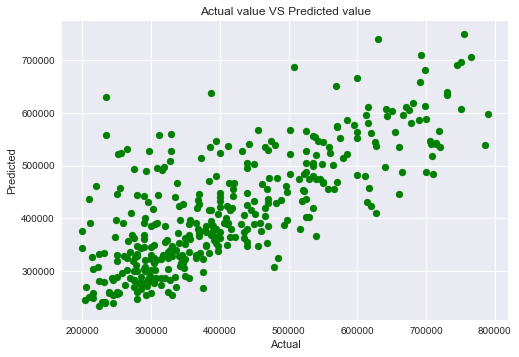

In [91]:
rf_pred = fitted_models['rf'].predict(X_test)
plt.scatter(y_test, rf_pred, c='green')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual value VS Predicted value')
plt.show()

In [92]:
fitted_models['rf'].best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=123,
           verbose=0, warm_start=False))])

The winning values for the hyperparameter is <br>
 - n_estimators = 200
 - max_features = 'auto'

### Summary:

By comparing the error metrics, it is clear that **Random Forest** is performing best for our goal of achieving an error estimate less than 70,000. <br> Random Forest algorithm with hyperparameter **n_estimators = 200 and max_features = 'auto'** generates the highest r-squared value and lowest error among the 5 algorithms.